# Homework 4

Before you run your homework run the code below:

In [238]:
import os
import sys
import hashlib
import pandas as pd
import numpy as np
import glob
import re
from urllib.request import urlopen
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn import datasets, linear_model


assert os.path.exists('../homeworks/HW4.ipynb')

info = sys.platform + '\n' + sys.version + '\n' + os.getcwd() + '\n' + os.getlogin()
name = hashlib.sha256(info.encode('utf-8')).hexdigest()
with open('../other/hw-4-'+name,'w') as f:
    f.write(info)

In [239]:
with open('../other/hw-4-'+name,'r') as f:
    info = f.read()
name = hashlib.sha256(info.encode('utf-8')).hexdigest()
assert os.path.exists('../other/hw-4-'+name)

## Task

Apply all of the supervised and unsupervised classification and clustering algorithms we learned so far for the [sonar dataset from UCI](http://archive.ics.uci.edu/ml/datasets/connectionist+bench+(sonar,+mines+vs.+rocks)).

The code for downloading the data is below. Don't load the data again and again in each subtask, refer the data as `SONAR` after you run the cell below.

In [240]:
with urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data") as fil:
    SONAR = pd.read_csv(fil, delimiter=',', header=None)

# datayi %25 test datasi olacak sekilde boluyoruz
Xtrain, Xtest, Ytrain, Ytest = train_test_split(SONAR.iloc[:,0:60], SONAR.iloc[:,60], test_size=0.25)

Split the tasks into subtasks and into separate cells.  Also before your analysis for each subtask, write a short paragraph before explaining which algorithm you are going to use. Each subtask should look like this

## Subtask 1: K-Means

- KMeans objemizi gerekli parametreler ile initialize edip model degiskenimize atadik, modelimize Xtrain datasini verdik. Daha sonrasinda Xtest datamizi kullanarak predict sonuclarimizi aldik. dikkat edilmesi gereken nokta KMeans datayi cluster'lara ayirip id verir. o id icin tahminde bulunup (bizim ornegimizde 1 numarali id'ye sahip cluster icin R, 0 numralari id'ye sahip cluster icin M) predicted datamiz ile karsilastirdik.

In [241]:

model = KMeans(n_clusters=2, random_state=0)
# model should be fit with train data
model.fit(Xtrain)
# predict with test data
predicted = model.predict(Xtest)
labels = {"R":1, "M":0}
# accuracy sonucu asagidaki durumda daha kotu bunun sebebi label'lari yanlis tahmin etmis olmamiz
# labels = {"R":0, "M":1}
real = Ytest.map(lambda x: labels[x])
cm = confusion_matrix(real,predicted)
print(cm)
accuracy = accuracy_score(real,predicted)

print(accuracy)

[[16 14]
 [ 8 14]]
0.5769230769230769


- KMeans unsupervised olmasi nedeni ile kotu bir sonuc verdi

## Subtask 2: KNN

- KMeans orneginde oldugu gibi KNN objesine initialzie edip model degiskenimize atadik. Komsuluk sayisi icin 5 vermemin sebebi tek sayida KNN algoritmasinin daha verimli calismasi.

In [242]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(Xtrain,Ytrain)
predicted = model.predict(Xtest)
cm = confusion_matrix(Ytest,predicted)
print(cm)
accuracy = accuracy_score(Ytest,predicted)
print(accuracy)

[[29  1]
 [ 5 17]]
0.8846153846153846


- Supervised olmasi nedeni ile KMeans'e kiyasla cok daha iyi bir accuracy degerimiz oldu

## Subtask 3: Naive Bayes Classifier


- Daha once Naive Bayes icin gerekli kutuphaneleri import etmedigimiz icin ilk satirda gerekli kutuphaneleri import ettik. Daha onceki ornekte oldugu gibi nesneye initialize edip degiskenimize atadik ve benzer sekilde modelimizi olusturup, predict edip accuray sonucu aldik.

In [243]:
from sklearn.naive_bayes import GaussianNB

# create naive bayes classifier
gaunb = GaussianNB()

# train classifier with dataset
gaunb = gaunb.fit(Xtrain, Ytrain)

# predict using classifier
predicted = gaunb.predict(Xtest)
cm = confusion_matrix(Ytest,predicted)
print(cm)
accuracy = accuracy_score(Ytest,predicted)
print(accuracy)

[[19 11]
 [ 2 20]]
0.75


- KNN kadar iyi accuracy sonucu vermese de supervised olmasi nedeni ile KMeans'den cok daha iyi sonuc elde ettik.

## Subtask 4: Linear Regression



In [244]:
# model = linear_model.LinearRegression()

# Train the model using the training sets
# Ytrain2 = Ytrain.replace(to_replace=['M', 'R'], value=[0, 1])
# Ytest2 = Ytest.replace(to_replace=['M', 'R'], value=[0, 1])
# model.fit(Xtrain, Ytrain)

# Make predictions using the testing set
# predicted = model.predict(Ytest)
# print(predicted)
# cm = confusion_matrix(Ytest,predicted)
# print(cm)
# accuracy = accuracy_score(Ytest,predicted)
# print(accuracy)
# ValueError: could not convert string to float: 'M'

- Elimizdeki data herhangi bir cizgi icin sureklilik saglamadigi icin Liner  methodu ile uyumlu degildir.

## Subtask 5: Hiearchical Clustering

- KMeans yonteminde oldugu gibi datamizi train edip, label id'lerine R ve M dedik ve predict sonuclarimizdan accuracy degerimizi hesapladik.

[[61 20]
 [44 31]]
0.5897435897435898


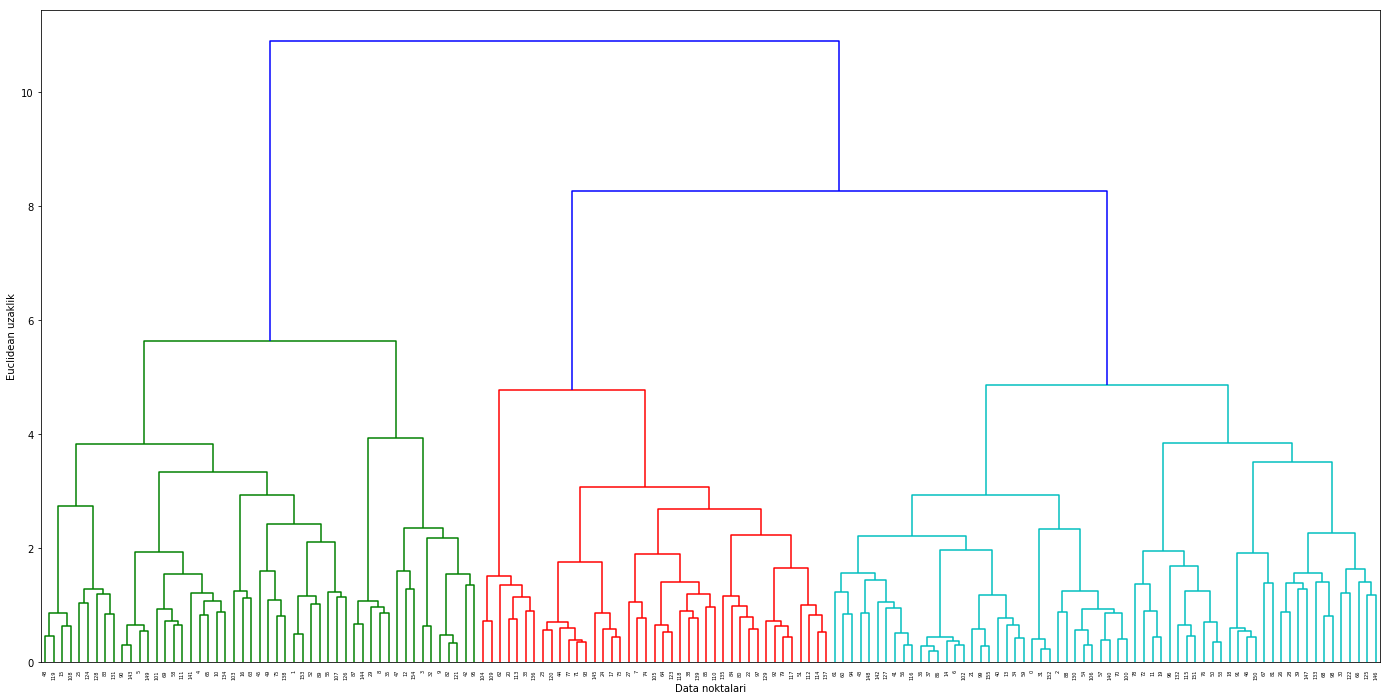

In [245]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram ,cut_tree
import matplotlib.pyplot as plt

model = AgglomerativeClustering(n_clusters=2)  
predicted = model.fit_predict(Xtrain)

labels = {"R":1, "M":0}

real = Ytrain.map(lambda x: labels[x])
cm = confusion_matrix(real,predicted)
print(cm)
accuracy = accuracy_score(real,predicted)

print(accuracy)

merg = linkage(Xtrain,method="ward")
cut_tree(n_clusters=2,Z=merg)
plt.figure(figsize=[24,12])
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("Data noktalari")
plt.ylabel("Euclidean uzaklik")
plt.show()

- Hiearchical Clustering methodu da KMeans kotu bir accuracy sonucu verdi.

## Subtask 6 : Logistic Regression

- Diger benzer sekilde calismaktadir.

In [246]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(Xtrain, Ytrain)
predicted = model.predict(Xtest)
cm = confusion_matrix(Ytest, predicted)
print(cm)
print(classifier.score(Xtest, Ytest))

[[24  6]
 [ 5 17]]
0.8461538461538461


/Users/furkanhatipoglu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


- Logistic regression classifier degil, probability estimator oldugu icin accuracy degerimiz iyi bir sonuc verdi.